<a href="https://colab.research.google.com/github/kwasicode/Artificial-Intelligence/blob/main/proect_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the modules

In [11]:
import tensorflow as tf
import os
import zipfile
import numpy as np
from matplotlib import pyplot as plt

Unzip

In [12]:
zip_file = 'tpms_lattice_data.zip'
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
  zip_ref.extractall()

  print(os.listdir())

['.config', 'tpms_lattice_data.zip', 'lat.jpeg', 'tpms_lattice_data', 'drive', 'sample_data']


GPU Memory Configuration

In [13]:
memory_unit = tf.config.experimental.list_physical_devices("GPU")
for i in memory_unit:
  tf.config.experimental.set_memory_growth(i, True)

tf.config.list_physical_devices("GPU")

[]

Preprocessing the image data

In [14]:
import imghdr
import cv2
data_set = "tpms_lattice_data"

file_ext = ['jpeg','jpg', 'bmp', 'png']

os.listdir(os.path.join(data_set, "Data_Lattice"))
os.listdir(os.path.join(data_set, "Data_tpms"))

for image_class in os.listdir(data_set):
    for image in os.listdir(os.path.join(data_set, image_class)):
        image_path = os.path.join(data_set, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in file_ext:
                print('not a jpeg, jpg, bmp and png {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Image fault {}'.format(image_path))

not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/scell-cube-thumb.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/batwingcube.8.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/starfish71fakecubelet.8.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/gyroid-frame038.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/C15P.8.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/N26-cube.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/Gyroid_1000.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/cy-cube-thumb.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/di67cubelet.8.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/gyroid-8cubes.8.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/pbatwingcube.8.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/octocube.2.gif
not a jpeg, jpg, bmp and png tpms_lattice_data/Data_tpms/N14-othercube.gif
not a jpeg, jpg, bmp and

Loading images as numpy arrays

In [15]:
data = tf.keras.utils.image_dataset_from_directory('/content/tpms_lattice_data')

Found 107 files belonging to 2 classes.


In [16]:
data_access = data.as_numpy_iterator()
image_label = data_access.next()

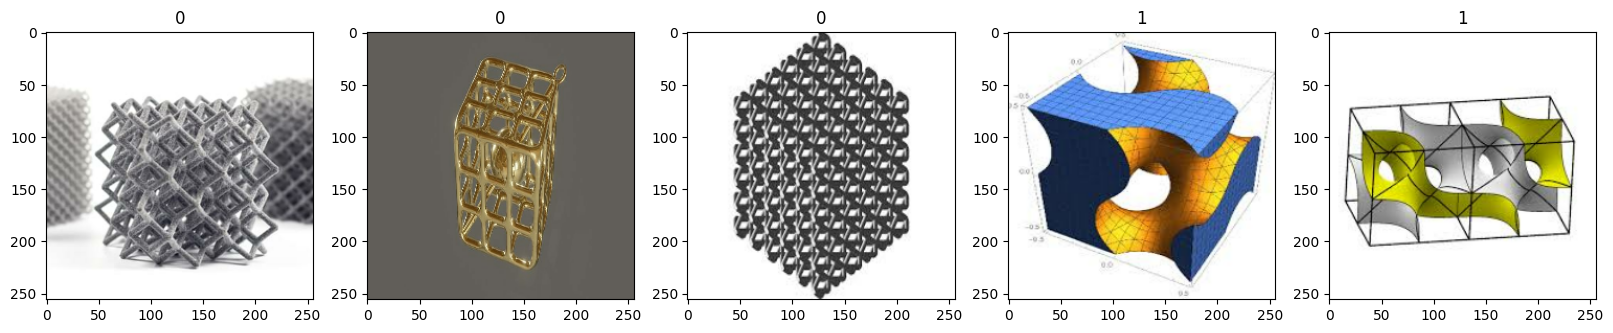

In [17]:
fig, ax = plt.subplots(ncols=5, figsize = (20, 20))
for idx, img in enumerate(image_label [0] [:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(image_label[1][idx])

Normalizing

In [18]:
data = data.map(lambda x,y: (x/255, y))

data.as_numpy_iterator().next
len(data)



4

Data Allocation

In [19]:
train_data = int(len(data)*.7)
val_data = int(len(data)*.2) +1
test_data = int(len(data)*.1)+1

training = data.take(test_data)
vali = data.skip(test_data).take(val_data)
testing = data.skip(train_data+val_data).take(test_data)

Building the model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model = Sequential()

#add the layers
#convulton and maxpooing layers with input shape
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

#adding the layers
#convulton and maxpooing layers
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

#adding the layers
#convulton and maxpooing layers
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


#flattening
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Model training and Evaluation

In [21]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
model_history = model.fit(training, epochs=25, validation_data=vali, callbacks=[tensorboard_callback])

Epoch 1/25
1/1 [==============================] - 7s 7s/step - loss: 0.7155 - accuracy: 0.3750 - val_loss: 1.9730 - val_accuracy: 0.5625
Epoch 2/25
1/1 [==============================] - 3s 3s/step - loss: 1.7169 - accuracy: 0.6250 - val_loss: 0.6161 - val_accuracy: 0.5000
Epoch 3/25
1/1 [==============================] - 5s 5s/step - loss: 0.6210 - accuracy: 0.5625 - val_loss: 0.8500 - val_accuracy: 0.3750
Epoch 4/25
1/1 [==============================] - 4s 4s/step - loss: 0.7340 - accuracy: 0.5312 - val_loss: 0.7320 - val_accuracy: 0.4375
Epoch 5/25
1/1 [==============================] - 3s 3s/step - loss: 0.6675 - accuracy: 0.5000 - val_loss: 0.5899 - val_accuracy: 0.7188
Epoch 6/25
1/1 [==============================] - 3s 3s/step - loss: 0.5320 - accuracy: 0.8125 - val_loss: 0.5466 - val_accuracy: 0.7500
Epoch 7/25
1/1 [==============================] - 6s 6s/step - loss: 0.4993 - accuracy: 0.8750 - val_loss: 0.5652 - val_accuracy: 0.6250
Epoch 8/25
1/1 [=========================

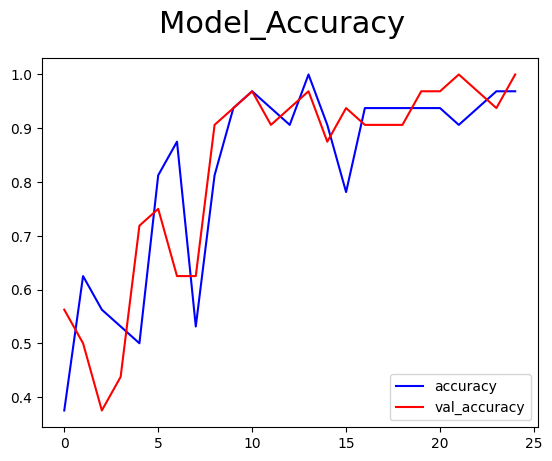

In [22]:
fig = plt.figure()
plt.plot(model_history.history['accuracy'], color='blue', label='accuracy')
plt.plot(model_history.history['val_accuracy'], color='red', label='val_accuracy')
fig.suptitle('Model_Accuracy', fontsize=22)
plt.legend(loc="lower right")
plt.show()

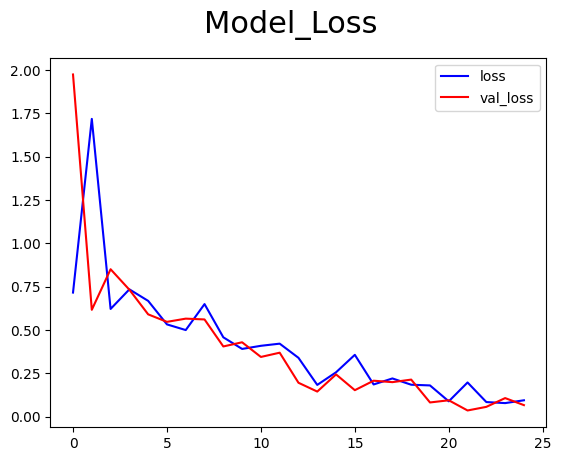

In [23]:
fig = plt.figure()
plt.plot(model_history.history['loss'], color='blue', label='loss')
plt.plot(model_history.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Model_Loss', fontsize=22)
plt.legend(loc="upper right")
plt.show()

In [24]:
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
model_accu = BinaryAccuracy()
model_preci = Precision()
model_rec = Recall()

for image_and_label in testing.as_numpy_iterator():
    X, y = image_and_label
    y_pred = model.predict(X)
    model_preci.update_state(y, y_pred)
    model_rec.update_state(y, y_pred)
    model_accu.update_state(y, y_pred)
print(model_preci.result(), model_rec.result(), model_accu.result())

1/1 [==============================] - 0s 248ms/step
tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.8333333, shape=(), dtype=float32) tf.Tensor(0.90909094, shape=(), dtype=float32)


Prdictions on new sample

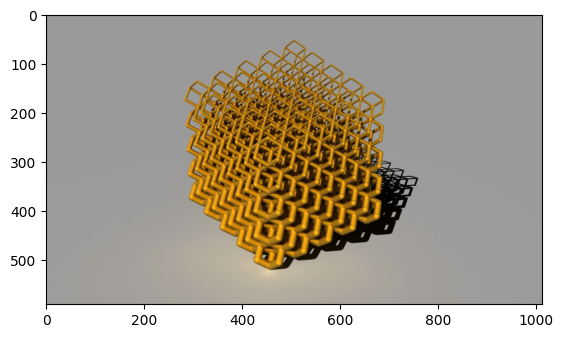

In [25]:
img_test = cv2.imread("/content/lat.jpeg")
plt.imshow(img_test)

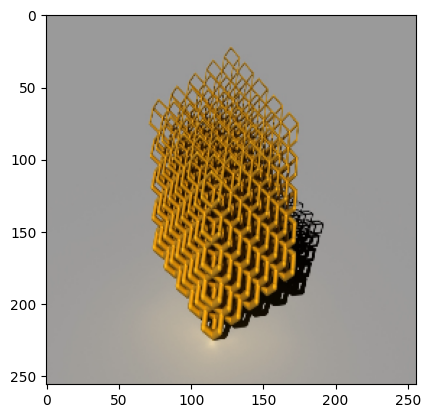

In [26]:
adjus_size = tf.image.resize(img_test, (256,256))
plt.imshow(adjus_size.numpy().astype(int))
plt.show()

In [27]:
y_pred = model.predict(np.expand_dims(adjus_size/255,0))
y_pred

1/1 [==============================] - 0s 41ms/step


array([[0.2104197]], dtype=float32)

In [28]:
if y_pred > 0.5:
  print(f'TPMS for high heat transfer efficiency')
else:
    print(f'Lattice strcuture for lower heat transfer')

Lattice strcuture for lower heat transfer


Saving model

In [29]:
from google.colab import drive

drive.mount('/content/drive')
model.save('/content/drive/My Drive/project_task2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
